# Soal Latihan

##  ``Hotel Reservation Cancellation Prediction``

Anda adalah Data Scientist di sebuah perusahaan hotel. Anda diberikan dataset berisi informasi pemesanan kamar hotel (*booking information*) baik untuk hotel kota (*city hotel*) maupun hotel resort. Dataset ini juga mengandung kapan *booking* dilakukan, lama menginap, jumlah pengunjung dewasa, anak-anak, dan/atau bayi, serta ketersediaan tempat parkir. Informasi lain mengenai dataset bisa Anda baca di keterangan dataset di bawah ini:  


## **Dataset**

Dataset ini berasal dari paper Jurnal Ilmiah berjudul "Hotel booking demand datasets" yang ditulis oleh Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. Penjelasan tiap feature/variabel dari Jurnal bisa Anda akses di  https://www.sciencedirect.com/science/article/pii/S2352340918315191

Apabila ingin mengetahui keterangan di setiap kolom, Anda bisa akses ke: https://www.kaggle.com/jessemostipak/hotel-booking-demand/data. 

__Batasan Data untuk Ujian__
* __Ukuran data__ yang digunakan adalah **5000 baris (_rows_) awal [:5000]**.
* __Variabel__ yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

## Cleaning and EDA
Lakukan data cleaning:
1) cek anomali pada data kalian dan perbaiki sesuai kebutuhan.

Lakukan EDA, selain untuk menentukan skema preprocessing kalian, jalankan Exploratory Data Analysis untuk:  
1) Memahami profil tamu/konsumen hotel (_customer profiling_).  
2) Memahami kebiasaan tamu/konsumen hotel (_customer behavior_).  

Berikan penjelasan tentang _insight_ yang Anda temukan dari hasil _Exploratory Data Analysis_ ke manajemen hotel!   

## Modelling

1. Ada **2 jenis kesalahan** yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:
>* Model memprediksi user akan *cancel booking* (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.
>* Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user *cancel booking* (membatalkan pesanan).  

Dalam konteks bisnis perhotelan, apabila pengunjung diasumsikan tidak *cancel booking* maka pihak hotel akan menyiapkan beberapa hal untuk menyambut kedatangan mereka, di antaranya:  
>* Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,
>* Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,
>* Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,
>* Menolak pengunjung lain yang memesan kamar yang telah dipesan (*booked room*), dan
>* Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan.  

a. Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda! 
b. Pilih *evaluation metric* yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!  

2.  Pilihlah setidaknya 3 model _machine learning_ yang Anda pahami untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan *cancel booking* atau tidak! 
>* Jelaskan secara singkat cara kerja model ML yang Anda gunakan!  

3.  Setelah Anda memilih _benchmark_ model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! `Parameter` apa saja yang anda pilih untuk `tunning`? Jelaskan maksud dari tiap-tiap parameter tersebut!

4. Bagaimana performa model Anda setelah *Hyper-parameter Tuning*? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan *cancel booking* atau tidak!  

``Good luck & Happy Coding``

Apabila sudah selesai, buat repository baru di github kalian dengan nama **Supervised Model** dan _commit_ jawaban kalian ke _repository_ tersebut. Kirimkan link repository kalian ke brigita.gems@gmail.com .

In [112]:
# Library

# Basic data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pre-processing
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Data

## Selecting Dataset

In [2]:
hotel=pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df=hotel.loc[:4999,['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


## Understanding Dataset
Kolom pada dataset yang telah dipilih lalu dicheck satu per satu agar bisa terlihat apakah ada nilai yang aneh atau menyimpang dari yang seharusnya. Lalu dilakukan cross check juga antara nilai yang ada pada dataframe dan penjelasan setiap kolom pada paper dataset hotel di science direct agar kita lebih mengerti isi dari nilai data pada setiap kolom.

In [5]:
df['hotel'].value_counts()

Resort Hotel    5000
Name: hotel, dtype: int64

In [6]:
df['is_canceled'].value_counts()

0    2702
1    2298
Name: is_canceled, dtype: int64

In [7]:
df['adults'].value_counts()

2     4175
1      654
3      146
0        6
26       5
4        3
27       2
20       2
5        2
40       1
50       1
55       1
6        1
10       1
Name: adults, dtype: int64

In [8]:
df['children'].value_counts()

0.0     4625
2.0      194
1.0      180
10.0       1
Name: children, dtype: int64

In [9]:
df['babies'].value_counts()

0    4927
1      72
2       1
Name: babies, dtype: int64

In [10]:
df['meal'].value_counts()

BB           3418
HB           1037
FB            319
Undefined     212
SC             14
Name: meal, dtype: int64

In [11]:
df['country'].value_counts()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
USA      28
POL      28
CHE      26
RUS      23
ITA      23
BRA      18
ROU      12
AUT      12
LUX      10
FIN       9
SWE       8
DNK       6
ARG       6
LVA       6
NOR       5
CHN       5
AUS       4
CZE       3
LTU       3
KOR       3
IND       3
DZA       2
TUR       2
CHL       2
EST       2
MAR       2
MEX       2
SVN       2
OMN       2
CRI       2
MOZ       2
ZAF       2
ISR       1
ZWE       1
CPV       1
ZMB       1
CYM       1
SRB       1
AGO       1
BLR       1
PRI       1
GRC       1
SMR       1
UKR       1
ALB       1
BWA       1
HUN       1
Name: country, dtype: int64

In [12]:
df['market_segment'].value_counts()

Online TA        2156
Groups           1025
Offline TA/TO     929
Direct            618
Corporate         261
Complementary      11
Name: market_segment, dtype: int64

In [13]:
df['distribution_channel'].value_counts()

TA/TO        3657
Direct       1068
Corporate     275
Name: distribution_channel, dtype: int64

In [14]:
df['reserved_room_type'].value_counts()

A    3167
D     847
E     540
G     169
C     109
F     101
H      63
L       3
P       1
Name: reserved_room_type, dtype: int64

In [15]:
df['booking_changes'].value_counts()

0     4242
1      582
2      120
3       31
4       18
5        4
6        2
17       1
Name: booking_changes, dtype: int64

In [16]:
df['deposit_type'].value_counts()

No Deposit    4461
Non Refund     477
Refundable      62
Name: deposit_type, dtype: int64

In [17]:
df['days_in_waiting_list'].value_counts()

0      4905
122      54
47       21
65       19
50        1
Name: days_in_waiting_list, dtype: int64

In [18]:
df['customer_type'].value_counts()

Transient          3699
Transient-Party    1057
Contract            219
Group                25
Name: customer_type, dtype: int64

In [19]:
df['required_car_parking_spaces'].value_counts()

0    4533
1     465
2       2
Name: required_car_parking_spaces, dtype: int64

In [20]:
df['total_of_special_requests'].value_counts()

0    2943
1    1239
2     690
3     121
4       7
Name: total_of_special_requests, dtype: int64

Penjelasan Kolom pada Dataset:
1. hotel: Hotel type, there are two type of hotel in the paper, but in this dataset there is only `Resort Hotel`.
2. is_canceled: Booking hotel:
    * `Canceled (1)`
    * `Not canceled (0)`.
3. adults: Number of adults in the booking hotel or booking logs.
4. children: Number of children in the booking hotel or booking logs.
5. babies: Number of babies in the booking hotel or booking logs.
6. meal: Type of meal booked: 
    * `Undefined/SC (No meal package)`
    * `BB-Bed and Breakfast`
    * `HB-Half Board (Breakfast/Other meal, usually breakfast and dinner)`
    * `FB-Full Board (Breakfast, Lunch, Dinner)`.             
7. country: Country of customer's origin.
8. market_segment: Market segment designation: 
    * `Online TA`, `Groups`
    * `Offline TA/TO`
    * `Direct`
    * `Corporate`
    * `Complementary`. 
9. distribution_channel: Booking distribution channel: 
    * `TA (Travel Agent)/TO (Tour Operation)`
    * `Direct`
    * `Corporate`.
10. reserved_room_type: Code of room type reserved, `A`, `C`, `D`, `E`, `F`, `G`, `H`, `L`, `P`.
11. booking_changes: Number of changes/amandements made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
12. deposit_type: Indication on if the customer made a deposit guarantee to the booking:
    * `No Deposit (No deposit was made)`
    * `Non Refund (A deposit was made in the value of the total stay cost payment equal or exceeded the total cost of stay)`
    * `Refundable (A deposit was made with a value under the total cost of stay)`.
13. days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.
14. customer_type: Type of booking, assuming one of four category: 
    * `Contract (Booking has an allotment or other type of contract associated with it)`
    * `Group (Booking associated with group)`
    * `Transient (Booking isn't part of group or contract and not associated to other transient booking)`
    * `Transient-party (Booking is transient but associated to at least other transient booking)`
15. required_car_parking_spaces: Number of car parking spaces required by the customer.
16. total_of_special_requests: Number of special requests made by the customer (e.g. twin bed/high floor).

Jenis-jenis tipe data pada dataset:
* **Categorical-Nominal:** `hotel`, `country`, `market_segment`, `distribution_channel`, `customer_type`, `deposit_type`, `meal`.
* **Categorical-Binary:** `is_canceled`.
* **Categorical-Ordinal:** `reserved_room_type`.
* **Numerical-Discrete:** `adults`, `children`, `babies`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`.

## Data Cleansing

In [21]:
df.isna().sum()
# Terdapat data NaN pada country, sehingga harus di imputasi oleh suatu nilai

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [22]:
df['country']=SimpleImputer(strategy='most_frequent').fit_transform(df[['country']])
#Impute NaN value pada country dengan nilai yang paling banyak di kolom country

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      5000 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

# Exploratory Data Analysis

## Data Distribution

In [24]:
from scipy.stats import normaltest
stat,pval=normaltest(df[['is_canceled','adults','children','babies','booking_changes','days_in_waiting_list',
               'required_car_parking_spaces','total_of_special_requests']])
pd.DataFrame(pval, index=['is_canceled','adults','children','babies','booking_changes','days_in_waiting_list',
               'required_car_parking_spaces','total_of_special_requests'], columns=['p-value'])

,p-value
is_canceled,0.000000e+00
adults,0.000000e+00
children,0.000000e+00
babies,0.000000e+00
booking_changes,0.000000e+00
days_in_waiting_list,0.000000e+00
required_car_parking_spaces,0.000000e+00
total_of_special_requests,4.877089e-170


Dari hasil analisis distribusi normal, terlihat bahwa semua data numerik pada dataset ini tidak terdistribusi secara normal (p-value <0.05). Hal ini dikarenakan data numerik pada dataset ini merupakan data numerik diskret.

## Outlier Analysis

In [25]:
def outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    batas_bawah = q1-(1.5*iqr)
    batas_atas = q3+(1.5*iqr)
    A=[]
    X=int(input('Masukkan jumlah data: '))
    for i in range(len(data)):
        if (data.loc[i] < batas_bawah) | (data.loc[i] > batas_atas):
            A.append(data.loc[i])
        else:
            continue
    if len(A) != 0:
        print(f'Terdapat outliers pada data sebanyak {len(A)} buah data')
    else:
        print('Tidak terdapat outliers pada data')
    print('Terdapat outliers sebanyak ', round((len(A)/X)*100,2),'% pada data ini')

In [26]:
outliers(df['adults'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 825 buah data
Terdapat outliers sebanyak  16.5 % pada data ini


In [27]:
outliers(df['children'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 375 buah data
Terdapat outliers sebanyak  7.5 % pada data ini


In [28]:
outliers(df['babies'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 73 buah data
Terdapat outliers sebanyak  1.46 % pada data ini


In [29]:
outliers(df['booking_changes'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 758 buah data
Terdapat outliers sebanyak  15.16 % pada data ini


In [30]:
outliers(df['days_in_waiting_list'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 95 buah data
Terdapat outliers sebanyak  1.9 % pada data ini


In [31]:
outliers(df['required_car_parking_spaces'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 467 buah data
Terdapat outliers sebanyak  9.34 % pada data ini


In [32]:
outliers(df['total_of_special_requests'])

Masukkan jumlah data: 5000
Terdapat outliers pada data sebanyak 128 buah data
Terdapat outliers sebanyak  2.56 % pada data ini


Berdasarkan hasil analisa diatas, terdapat 4 kolom dengan jumlah outlier lebih dari 5%, yaitu kolom `adults`, `children`, `booking_changes`, dan `required_car_parking_spaces`

### Barplot before handling outlier

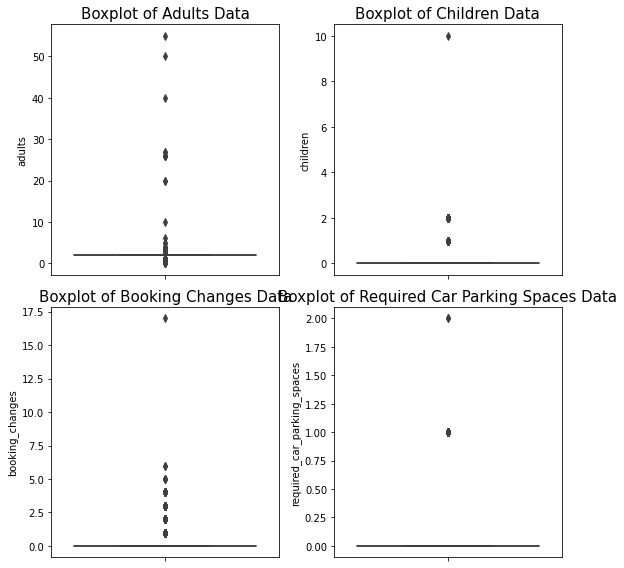

In [33]:
plt.figure(figsize=(12,12))

# 1. Boxplot adults
plt.subplot(2,3,1)
sns.boxplot(data=df, y='adults')
plt.title('Boxplot of Adults Data', fontsize=15)

# 2. Boxplot children
plt.subplot(2,3,2)
sns.boxplot(data=df, y='children')
plt.title('Boxplot of Children Data', fontsize=15)

# 3. Boxplot babies
plt.subplot(2,3,3)
sns.boxplot(data=df, y='babies')
plt.title('Boxplot of Babies Data', fontsize=15)

# 4. Boxplot booking_changes
plt.subplot(2,3,4)
sns.boxplot(data=df, y='booking_changes')
plt.title('Boxplot of Booking Changes Data', fontsize=15)

# 5. Boxplot required_car_parking_spaces
plt.subplot(2,3,5)
sns.boxplot(data=df, y='required_car_parking_spaces')
plt.title('Boxplot of Required Car Parking Spaces Data', fontsize=15)

# 6. Boxplot total_of_special_requests
plt.subplot(2,3,6)
sns.boxplot(data=df, y='total_of_special_requests')
plt.title('Boxplot of Total of Special Requests Data', fontsize=15)

plt.tight_layout()
plt.show()

### Handling Outlier
Untuk handling outlier bisa menggunakan binning atau bisa dengan drop beberapa data outlier. Pada kasus ini karena banyak data yang terpolarisasi pada satu nilai, sehingga metode binning dirasa kurang tepat, sehingga untuk **handling outlier dipilih drop data** yang memang jauh dari range data mayoritas.

#### Drop Several Data

In [34]:
# 1.Adults Data
df[df['adults']==0] 
# Dapat dilihat bahwa tidak mungkin anak kecil dan bayi dapat memesan hotel tanpa kehadiran orang dewasa, sehingga data 
# ini harus di drop.

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,1,No Deposit,0,Transient-Party,0,0
2409,Resort Hotel,0,0,0.0,0,SC,PRT,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
3181,Resort Hotel,0,0,0.0,0,SC,ESP,Groups,TA/TO,A,0,No Deposit,0,Transient-Party,0,0
3684,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
3708,Resort Hotel,0,0,0.0,0,SC,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0
4127,Resort Hotel,1,0,0.0,0,SC,PRT,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


In [35]:
df.drop(index=df[df['adults']==0].index, axis=0, inplace=True) #Drop adults=0

In [36]:
df.drop(index=df[df['adults']>3].index, axis=0, inplace=True) #Drop adults>3
# Pada analisa boxplot sebelumnya, untuk handling outliers, maka kita akan drop nilai adults yang lebih dari 3,
# agar mengurangi outliers.

In [37]:
# 2.Children Data
df.drop(index=df[df['children']>2].index, axis=0, inplace=True) #Drop children>2
# Untuk menghilangkan outliers, kita drop nilai children > 2

In [38]:
# 3.Babies Data
df.drop(index=df[df['babies']>1].index, axis=0, inplace=True) #Drop babies>1
# Untuk menghilangkan outliers, kita drop nilai babies > 1

In [39]:
# 4.Booking Changes Data
df.drop(index=df[df['booking_changes']>3].index, axis=0, inplace=True) #Drop booking_changes>3
# Untuk menghilangkan outliers, kita drop nilai booking_changes > 3

In [40]:
# 5. Required Parking Spaces Data
df.drop(index=df[df['required_car_parking_spaces']>1].index, axis=0, inplace=True) #Drop required_car_parking_spaces > 1
# Untuk menghilangkan outliers, kita drop nilai required_car_parking_spaces > 1

In [41]:
# 6. Total of Special Requests Data
df.drop(index=df[df['total_of_special_requests']>3].index, axis=0, inplace=True) #Drop total_of_special_requests > 3
# Untuk menghilangkan outliers, kita drop nilai total_of_special_requests > 3

#### Final Data

In [42]:
df.shape[0]/5000*100
# Data yang dipakai untuk analisis sekitar 98,8% dari data awal

98.8

In [43]:
df.reset_index(drop=True)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4936,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4937,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4938,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


### Barplot after handling outlier

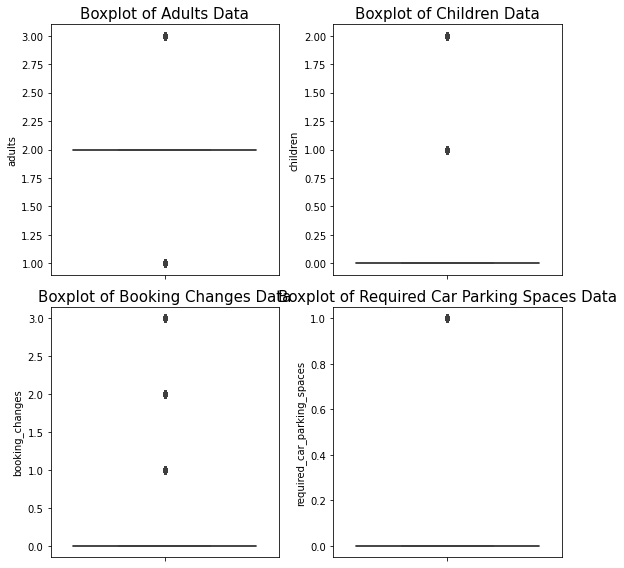

In [44]:
plt.figure(figsize=(8,8))

# 1. Boxplot adults
plt.subplot(2,2,1)
sns.boxplot(data=df, y='adults')
plt.title('Boxplot of Adults Data', fontsize=15)

# 2. Boxplot children
plt.subplot(2,2,2)
sns.boxplot(data=df, y='children')
plt.title('Boxplot of Children Data', fontsize=15)

# 3. Boxplot booking_changes
plt.subplot(2,2,3)
sns.boxplot(data=df, y='booking_changes')
plt.title('Boxplot of Booking Changes Data', fontsize=15)

# 4. Boxplot required_car_parking_spaces
plt.subplot(2,2,4)
sns.boxplot(data=df, y='required_car_parking_spaces')
plt.title('Boxplot of Required Car Parking Spaces Data', fontsize=15)

plt.tight_layout()
plt.show()

## Numerical Feature Analysis

### Correlation

In [45]:
corr=df[['is_canceled','adults','children','babies','booking_changes','days_in_waiting_list',
         'required_car_parking_spaces','total_of_special_requests']].corr(method='spearman')
# Karena korelasi yang dicari adalah antara data kategorikal dan data numerik yang tidak terdistribusi normal,
# maka dipakai korelasi spearman.

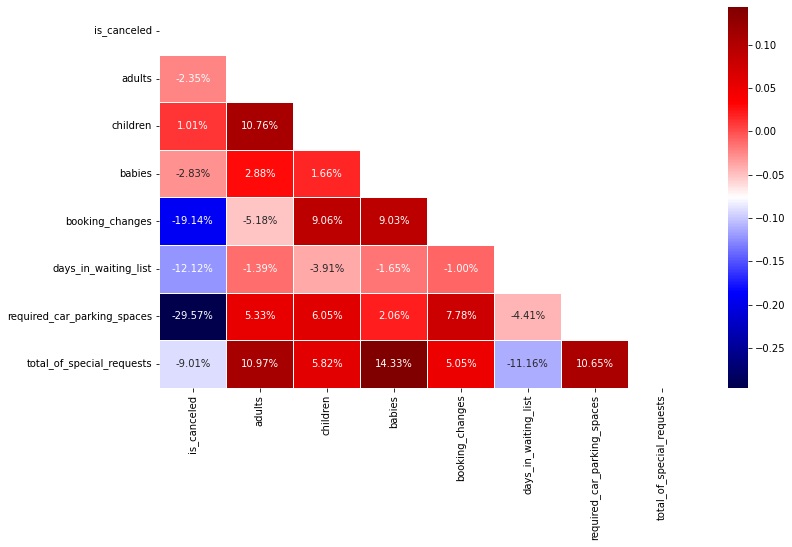

In [46]:
plt.figure(figsize=(12,7))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)
plt.show()

Dapat dilihat dari Heatmap, bahwa cancellation booking hotel memiliki korelasi yang sangat lemah terhadap semua data numerik. Hanya `booking_changes`, `days_in_waiting_list` dan `required_car_parking_spaces` yang memiliki nilai korelasi diatas 10% terhadap hotel cancellation dan semuanya memiliki hubungan berbanding terbalik.

### Barplot

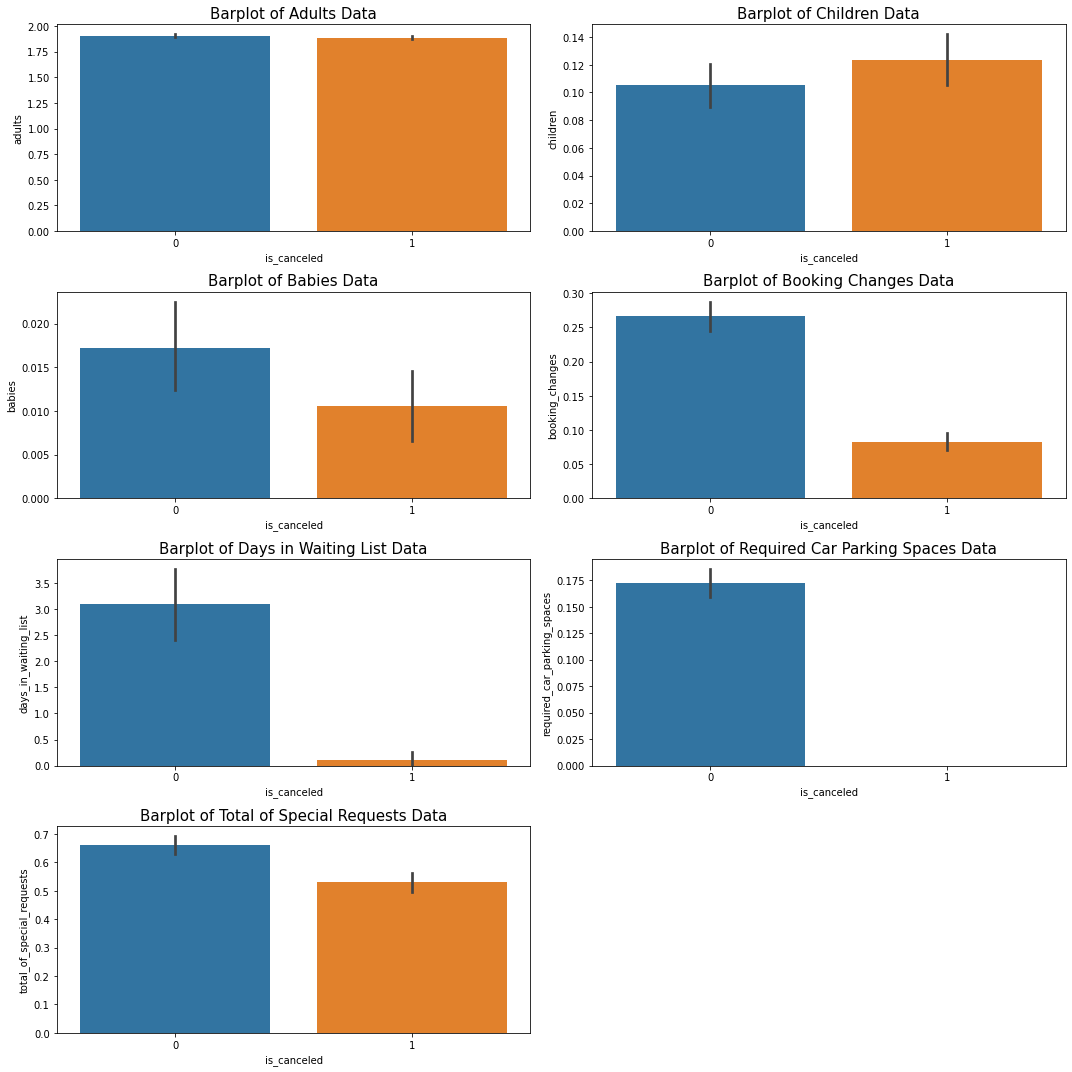

In [67]:
plt.figure(figsize=(15,15))

# 1. Barplot adults
plt.subplot(4,2,1)
sns.barplot(data=df, x='is_canceled', y='adults', estimator=np.mean)
plt.title('Barplot of Adults Data', fontsize=15)

# 2. Barplot children
plt.subplot(4,2,2)
sns.barplot(data=df, x='is_canceled', y='children', estimator=np.mean)
plt.title('Barplot of Children Data', fontsize=15)

# 3. Barplot babies
plt.subplot(4,2,3)
sns.barplot(data=df, x='is_canceled', y='babies', estimator=np.mean)
plt.title('Barplot of Babies Data', fontsize=15)

# 4. Barplot booking changes
plt.subplot(4,2,4)
sns.barplot(data=df, x='is_canceled', y='booking_changes', estimator=np.mean)
plt.title('Barplot of Booking Changes Data', fontsize=15)

# 5. Barplot days in waiting list
plt.subplot(4,2,5)
sns.barplot(data=df, x='is_canceled', y='days_in_waiting_list', estimator=np.mean)
plt.title('Barplot of Days in Waiting List Data', fontsize=15)

# 6. Barplot required car parking spaces
plt.subplot(4,2,6)
sns.barplot(data=df, x='is_canceled', y='required_car_parking_spaces', estimator=np.mean)
plt.title('Barplot of Required Car Parking Spaces Data', fontsize=15)

# 7. Barplot total of special requests
plt.subplot(4,2,7)
sns.barplot(data=df, x='is_canceled', y='total_of_special_requests', estimator=np.mean)
plt.title('Barplot of Total of Special Requests Data', fontsize=15)

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis dari barplot antara semua data numerikal dan kolom is_canceled terdapat beberapa hal menarik yang bisa dijumpai. Yaitu data `required_car_parking_spaces` **tidak memiliki data is_canceled (1) sama sekali**, padahal data pada kolom ini memiliki korelasi yang paling besar diantara data-data lainnya. Selain itu data `booking_changes` dan `days_in_waiting_list` yang juga memiliki korelasi relatif lebih besar dengan is_canceled, memiliki proporsi **data is_canceled (1) yang lebih sedikit dibandingkan data lainnya**. Sehingga fitur-fitur tersebut mungkin tidak akan terlalu memiliki pengaruh terhadap prediksi modelling yang akan dilakukan, meskipun memiliki korelasi yang relatif tinggi dibandingkan fitur numerik lainnya.

Karena data numerikal yang ada semuanya merupakan data numerikal discrete dengan variasi nilai data yang sedikit, maka kita bisa melakukan exploratory data analisis menggunakan pie chart untuk melihat proporsi hotel booking cancellation dari masing-masing data tersebut. Pada kasus ini kita hanya tertarik kepada tamu hotel yang melakukan cancellation booking, sehingga analisis pun hanya pada tamu hotel tersebut.

In [68]:
df_cancel=df[df['is_canceled']==1]

In [70]:
pop_ad=df_cancel['adults'].value_counts()

In [71]:
pop_child=df_cancel['children'].value_counts()

In [72]:
pop_babies=df_cancel['babies'].value_counts()

In [73]:
pop_book=df_cancel['booking_changes'].value_counts()

In [74]:
pop_days=df_cancel['days_in_waiting_list'].value_counts()

In [75]:
pop_total=df_cancel['total_of_special_requests'].value_counts()

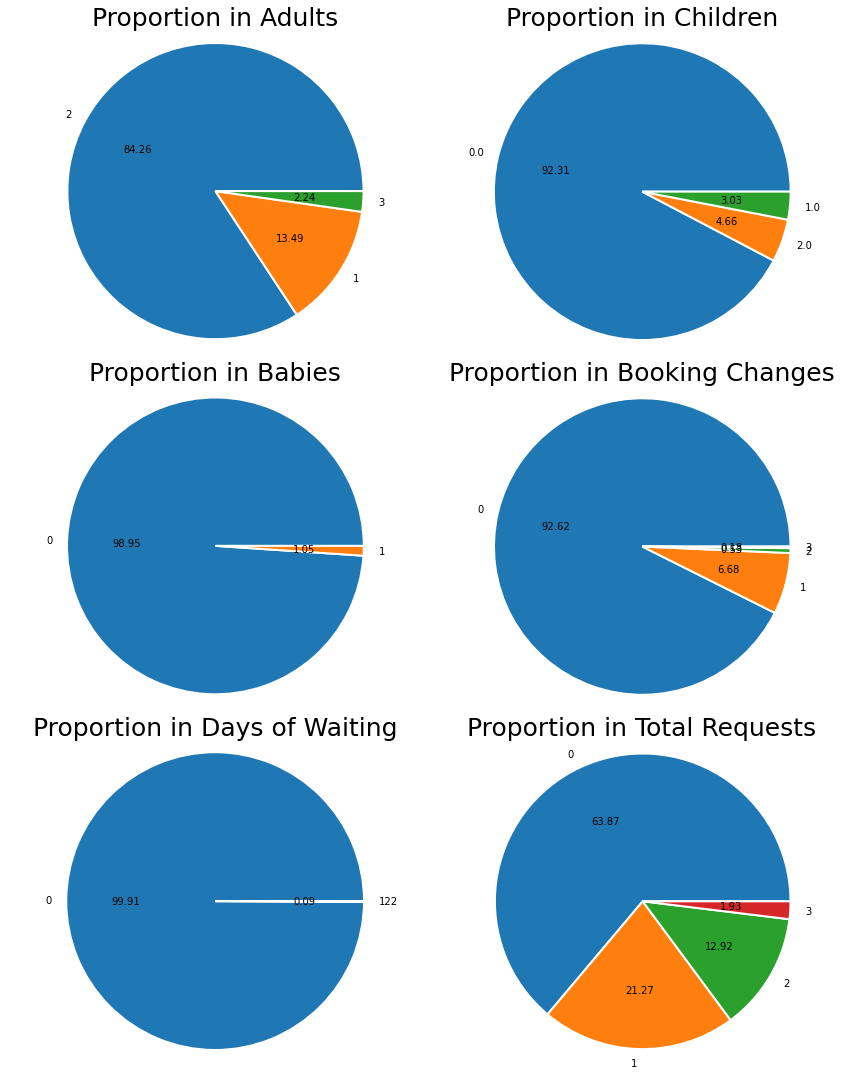

In [77]:
plt.figure(figsize=(12,15))

# 1. Adults
plt.subplot(3,2,1)
plt.pie(
    pop_ad,
    labels=pop_ad.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Adults', fontsize=25)

# 2. Children
plt.subplot(3,2,2)
plt.pie(
    pop_child,
    labels=pop_child.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Children', fontsize=25)

# 3. Babies
plt.subplot(3,2,3)
plt.pie(
    pop_babies,
    labels=pop_babies.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Babies', fontsize=25)

# 4. Booking Changes
plt.subplot(3,2,4)
plt.pie(
    pop_book,
    labels=pop_book.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Booking Changes', fontsize=25)

# 5. Days in Waiting List
plt.subplot(3,2,5)
plt.pie(
    pop_days,
    labels=pop_days.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Days of Waiting', fontsize=25)

# 6. Total of Special Requests
plt.subplot(3,2,6)
plt.pie(
    pop_total,
    labels=pop_total.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion in Total Requests', fontsize=25)

plt.tight_layout()
plt.show()

Terdapat beberapa hal menarik yang ditemukan pada analisis data numerikal-diskret terhadap cancellation hotel, diantaranya adalah:
* Tamu hotel orang dewasa `adults` **yang berjumlah dua orang** memiliki proporsi yang besar dalam melakukan cancel booking.
* Tamu hotel yang **tidak membawa anak kecil** `child` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel yang **tidak membawa bayi** `babies` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel yang **tidak mengganti hari booking** `booking changes` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel yang **tidak menunggu hari reservasi hotel** `Days of waiting` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel yang **tidak memesan fasilitas tambahan** `Total of Special Request` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel **tidak memerlukan lahan parkir** `Required car parking`, sama sekali tidak melakukan cancel booking.

## Categorical Feature Analysis

Setelah kita menganalisis fitur-fitur numerik, kita akan mencoba melihat proporsi dari masing-masing fitur kategorikal yang mempengaruhi cancellation hotel booking. Maka dari itu kita hanya menggunakan data proporsi dari booking hotel yang di cancel saja (is_canceled = 1)

In [48]:
df_cancel=df[df['is_canceled']==1]

In [49]:
pop_meal=df_cancel['meal'].value_counts()

In [50]:
pop_country=df_cancel['country'].value_counts()

In [51]:
pop_market=df_cancel['market_segment'].value_counts()

In [52]:
pop_dist=df_cancel['distribution_channel'].value_counts()

In [53]:
pop_room=df_cancel['reserved_room_type'].value_counts()

In [54]:
pop_depo=df_cancel['deposit_type'].value_counts()

In [55]:
pop_cust=df_cancel['customer_type'].value_counts()

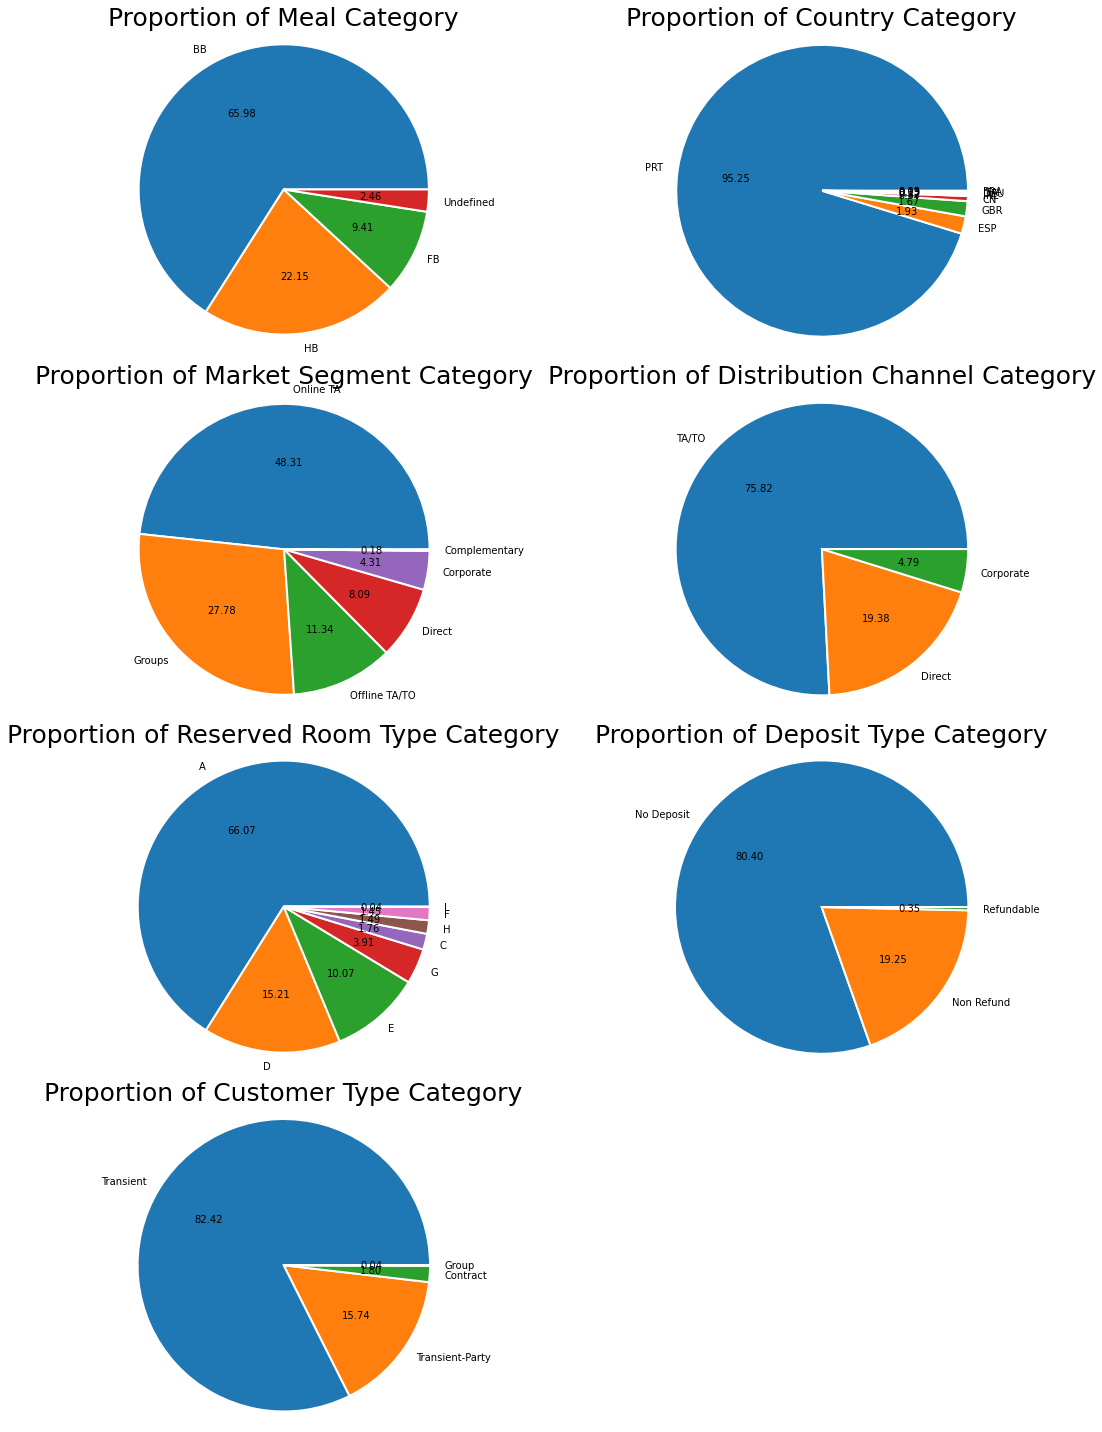

In [56]:
plt.figure(figsize=(15,20))

# 1. Meal Category
plt.subplot(4,2,1)
plt.pie(
    pop_meal,
    labels=pop_meal.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Meal Category', fontsize=25)

# 2. Country Category
plt.subplot(4,2,2)
plt.pie(
    pop_country,
    labels=pop_country.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Country Category', fontsize=25)

# 3. Market Segment Category
plt.subplot(4,2,3)
plt.pie(
    pop_market,
    labels=pop_market.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Market Segment Category', fontsize=25)

# 4. Distribution Channel Category
plt.subplot(4,2,4)
plt.pie(
    pop_dist,
    labels=pop_dist.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Distribution Channel Category', fontsize=25)

# 5. Reserved Room Type Category
plt.subplot(4,2,5)
plt.pie(
    pop_room,
    labels=pop_room.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Reserved Room Type Category', fontsize=25)

# 6. Deposit Type Category
plt.subplot(4,2,6)
plt.pie(
    pop_depo,
    labels=pop_depo.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Deposit Type Category', fontsize=25)

# 7. Customer Type Category
plt.subplot(4,2,7)
plt.pie(
    pop_cust,
    labels=pop_cust.index,
    wedgeprops={'edgecolor':'w','linewidth':2},
    autopct='%.2f'
)
plt.axis('equal')
plt.title('Proportion of Customer Type Category', fontsize=25)
plt.tight_layout()
plt.show()

Terdapat beberapa hal menarik yang ditemukan pada analisis data kategorikal terhadap cancellation hotel, diantaranya adalah:
* Tamu hotel yang memilih paket meal `BB` diikuti dengan paket `HB` memiliki proporsi yang besar dalam melakukan cancel booking.
* Tamu hotel yang berasal dari negara `PRT (Portugal)` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel yang berasal dari market segment `TA Online` dan `Group` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel booking tiket melalui `TA Online` dan `Direct` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel booking kamar tipe `A` dan `D` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel dengan deposit type `No Deposit` dan `Non-Refund` memiliki proporsi yang sangat besar dalam melakukan cancel booking.
* Tamu hotel dengan customer type `Transient` dan `Transient-Party` memiliki proporsi yang sangat besar dalam melakukan cancel booking.

## Customer Profilling and Behaviour

In [85]:
df[df['is_canceled']==1].describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,2275.0,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.0,2275.000000
mean,1.0,1.887473,0.123516,0.010549,0.082637,0.107253,0.0,0.529231
std,0.0,0.380478,0.448927,0.102190,0.311368,3.616501,0.0,0.789889
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.0,3.000000,2.000000,1.000000,3.000000,122.000000,0.0,3.000000


In [90]:
df[df['is_canceled']==1].describe(include=object)

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,2275,2275,2275,2275,2275,2275,2275,2275
unique,1,4,8,6,3,8,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,2275,1501,2167,1099,1725,1503,1829,1875


In [94]:
(df[df['is_canceled']==1].describe(include=object).loc['freq',:]/4940*100).sort_values(ascending=False)

hotel                   46.052632
country                 43.866397
customer_type           37.955466
deposit_type            37.024291
distribution_channel    34.919028
reserved_room_type      30.425101
meal                    30.384615
market_segment          22.246964
Name: freq, dtype: object

Pada kasus di dataset ini, kita hanya tertarik kepada profil para tamu yang kemungkinan besar melakukan cancellation booking hotel. **Berikut adalah hasil analisa profil tamu hotel yang melakukan cancellation booking hotel berdasarkan statistik yang ada:**
* `adults` berjumlah 2 orang yang tidak membawa anak kecil (`children` berjumlah 0) dan bayi (`babies` berjumlah 0).
* Tamu hotel yang tidak menunggu hari reservasi hotel `days_in_waiting_lists`, tidak memesan fasilitas tambahan `total_of_special_requests`, dan tidak memerlukan lahan parkir mobil `required_car_parking_spaces`.
* Sebanyak **43,86%** cancellation booking hotel dari total data semua tamu hotel berasal dari negara Portugal `PRT`.
* Sebanyak **37%** cancellation booking hotel dari total data semua tamu hotel tidak melakukan deposit `No Deposit` dan juga customer `Transient`.
* Sebanyak **35%** cancellation booking hotel dari total data semua tamu hotel berasal dari distribution channel `TA/TO`.
* Sebanyak **30%** cancellation booking hotel dari total data semua tamu hotel memesan tipe kamar `A` dan juga memilih paket meal `BB`.
* Sebanyak **22%** cancellation booking hotel dari total data semua tamu hotel berasal dari market segment `Online TA`.

# Machine Learning Modelling

## Before Model Based Feature Selection

In [62]:
df['is_canceled'].value_counts()/4940*100
# Dapat dilihat bahwa label target memiliki selisih jumlah data 8%, sehingga dapat dianggap bahwa data yang ada merupakan
# data yang balance, sehingga tidak perlu menggunakan imbalance classification.

0    53.947368
1    46.052632
Name: is_canceled, dtype: float64

In [100]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
5,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


### Feature Engineering and Pre-Processing Data

In [107]:
categorical=['country', 'market_segment', 'distribution_channel', 'customer_type', 'deposit_type', 'meal','reserved_room_type']

for i in categorical:
    print(df[i].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'UKR' 'SMR'
 'LVA' 'PRI' 'SRB' 'IND' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary']
['Direct' 'Corporate' 'TA/TO']
['Transient' 'Contract' 'Transient-Party' 'Group']
['No Deposit' 'Refundable' 'Non Refund']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L']


Skema Pre-Processing:

1. Encode pre-processing:
* onehot: distribution_channel, customer_type, deposit_type
* binary: country, market_segment, meal
* ordinal: reserved_room_type

2. is_canceled is already encode.        

3. We don't use hotel data because all of the value is `Resort Hotel`.       

4. Numerical data: All data passthrough.     

In [150]:
x=df[['distribution_channel', 'customer_type', 'deposit_type','country', 'market_segment', 'meal','reserved_room_type',
  'adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']]
y=df['is_canceled']

In [151]:
ordinal_mapping=[{'col':'reserved_room_type',
                  'mapping':{None:0, 'A':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'L':8}}]
transformer=ColumnTransformer([
    ('onehot',ce.OneHotEncoder(drop_invariant=True),['distribution_channel', 'customer_type', 'deposit_type']),
    ('binary',ce.BinaryEncoder(drop_invariant=True),['country', 'market_segment', 'meal']),
    ('ordinal',ce.OrdinalEncoder(mapping=ordinal_mapping),['reserved_room_type'])
], remainder='passthrough')

### Data Splitting

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=2020)

### Model Benchmarking and Metric Evaluation

Untuk model benchmarking, terdapat 4 model machine learning yang dipilih, yakni:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost Classifier

1. Logistic Regression merupakan salah satu model prediksi untuk mengukur probability dari suatu kejadian pada suatu kelas atau peristiwa. Model ini menggunakan nilai dari odds dan rasio dari odds untuk memperoleh probabilitas tersebut.                
2. Decision Tree merupakan salah satu model machine learning yang menggunakan hierarki dari pertanyaan jika maka yang akan menghasilkan suatu kesimpulan. Pertanyaan jika maka tersebut berdasarkan pada fitur yang ada dalam model. Dalam algoritma machine learning, Decision Tree akan membagi fitur-fitur yang ada hingga label yang tersebar menjadi semakin homogen. Pembagian tersebut dapat menggunakan perhitungan gini impurity atau entropy. Hasil dari pembagian tersebut berupa flowchart dengan banyak percabangan sehingga mirip seperti pohon.                         
3. Random Forest merupakan salah satu model machine learning yang memiliki dasar Decision Tree (Tree Based Ensemble Model). Dimana dalam model ini akan diambil beberapa fitur secara acak untuk kemudian dijadikan decision tree. Terdapat banyak pohon keputusan yang dibuat sehingga pengambilan kesimpulan akhir dari model ini menggunakan voting dari hasil masing-masing pohon keputusan.              
4. XGBoost merupakan salah satu model machine learning yang memiliki dasar Decision Tree (Tree Based Ensemble Model). Cara kerja dari XGBoost adalah membuat benyak model decision tree lalu mengevaluasinya. Model yang memiliki performa kurang baik akan mendapatkan bobot penilaian yang lebih sehingga akan mengubah model dengan performa kurang baik menjadi lebih baik scara berulang (iterative).

In [153]:
# Memanggil algoritma untuk model benchmarking
logreg=LogisticRegression(solver='liblinear',random_state=2020)
tree=DecisionTreeClassifier(max_depth=3, random_state=2020)
forest=RandomForestClassifier(max_depth=3, random_state=2020)
xgb=XGBClassifier(random_state=2020)
skfold=StratifiedKFold(n_splits=5)

In [154]:
# Pipeline untuk setiap model benchmarking, agar mencegah data leakage pada saat proses cross-validasi
logreg_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',logreg)
])
tree_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',tree)
])
forest_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',forest)
])
xgb_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',xgb)
])

Untuk pemilihan metric evaluasi pada kasus ini, kita akan memilih berdasarkan confusion metric, dimana sudah diset sebelumnya bahwa **default pada kasus ini adalah is_canceled (1)** dan **not default adalah not_canceled (0)**.            
Berdasarkan confusion metric terdapat empat kemungkinan antara kejadian nyata dengan prediksi data hasil machine learning, yakni:
1. Kejadian nyata is_canceled (1) diprediksi is_canceled (1) **(TP)**
2. Kejadian nyata is_canceled (1) diprediksi not_canceled (0) **(FN)**
3. Kejadian nyata not_canceled (0) diprediksi not_canceled (0) **(TN)**
4. Kejadian nyata not_canceled (0) diprediksi is_canceled (1) **(FP)**

Berdasarkan konteks bisnis proses dari industri perhotelan yang telah dijabarkan pada soal, apabila calon tamu hotel tidak membatalkan booking kamar, maka pihak hotel akan menyiapkan berbagai kebutuhan calon tamu tersebut, diantaranya menyiapkan makanan, transportasi penjemputan, bahkan menolak reservasi dari calon tamu hotel yang lainnya, *tentu saja dalam mempersiapkan hal-hal ini pihak hotel akan mengeluarkan budget untuk makanan dan transportasi, bahkan menolak reservasi lainnya yang memang menjadi sumber pendapatan dari hotel ini*.             

Pada kenyataannya, terdapat kemungkinan bahwa tamu yang sudah diprediksi akan datang akan tetapi pada kenyataannya tamu tidak datang dan menyebabkan kerugian materi/keuangan bagi pihak hotel. 

Selain itu terdapat juga kemungkinan tamu yang diprediksi tidak datang tetapi tamu tersebut datang ke hotel, untuk menangani kasus ini, pihak hotel dapat mengkoordinasikan saja kepada para pekerjanya untuk mengakomodasi kebutuhan sang tamu tersebut dengan sebaik mungkin, walaupun nama baik dan integritas dari hotel ini akan menjadi taruhannya, akan tetapi apabila pihak hotel dapat menangani kesalahan prediksi ini dengan service terbaiknya kepada tamu tersebut, mungkin tamu tersebut akan berubah pikiran dan akan merasa puas terhadap pelayanan hotel.       

Sehingga dalam model machine learning ini akan digunakan metric evaluasi **`Recall`** yang bertujuan untuk menekan prediksi *False Negative*.

In [155]:
# Cross-validation
models=[logreg_pipe, tree_pipe, forest_pipe, xgb_pipe]
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv=cross_val_score(i,x_train,y_train,scoring='recall')
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

pd.DataFrame({
    'model': ['Logreg','Tree','Forest','XGB'],
    'mean': mean_score,
    'std': std_score
})

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,mean,std
0,Logreg,0.930769,0.020951
1,Tree,0.980769,0.008333
2,Forest,0.974176,0.010220
3,XGB,0.910440,0.013187


Dapat dilihat pada hasil cross-vaidasi menggunakan metric evaluasi recall, model memiliki performa diatas 90% dengan standar deviasi yang kecil. Model Decision Tree Classifier menunjukan nilai cross validasi yang sangat tinggi dibandingkan model lainnya yakni 98% dengan standar deviasi yang sangat kecil dibandingkan model lainnya (model lebih stabil), sehingga **model yang dipilih untuk dilakukan hyperparameter tunning adalah Decision Tree Classifier**.

### Hyperparameter Tunning

In [156]:
tree_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop_invariant=True),
                                    ['distribution_channel', 'customer_type',
                                     'deposit_type']),
                                   ('binary', BinaryEncoder(drop_invariant=True),
                                    ['country', 'market_segment', 'meal']),
                                   ('ordinal',
                                    OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                             'mapping': {None: 0,
                                                                         'A': 1,
                                                                         'C': 2,
                                                                         'D': 3,
                                                                         

In [129]:
# Pemilihan hyperparameter yang akan di tunning
criterion=['entropy','gini']
max_depth=[2,3,4,5,6,7]
min_samples_leaf=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
min_samples_split=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
max_features=[2,3,4,5]

tree_param={
    'model__criterion':criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split':min_samples_split,
    'model__max_features':max_features
}

In [157]:
# Menggunakan grid search untuk melakukan hyperparameter tunning dan menemukan kombinasi parameter terbaik untuk model ini
grid_search= GridSearchCV(
    tree_pipe,
    param_grid=tree_param,
    cv=skfold,
    scoring='recall',
    n_jobs= -1 
)

In [158]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop_invariant=True),
                                                                         ['distribution_channel',
                                                                          'customer_type',
                                                                          'deposit_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(drop_invariant=True),
                                                                         ['country',
                               

In [159]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.9857142857142858
best param {'model__criterion': 'entropy', 'model__max_depth': 2, 'model__max_features': 2, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}


In [160]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175531,0.029552,0.048271,0.012997,entropy,2,2,5,5,"{'model__criterion': 'entropy', 'model__max_de...",0.978022,0.989011,0.983516,0.994505,0.983516,0.985714,0.005603,1
1,0.186502,0.023167,0.049668,0.004566,entropy,2,2,5,10,"{'model__criterion': 'entropy', 'model__max_de...",0.978022,0.989011,0.983516,0.994505,0.983516,0.985714,0.005603,1
2,0.187500,0.021731,0.042086,0.004779,entropy,2,2,5,15,"{'model__criterion': 'entropy', 'model__max_de...",0.978022,0.989011,0.983516,0.994505,0.983516,0.985714,0.005603,1
3,0.189095,0.021910,0.047673,0.006979,entropy,2,2,5,20,"{'model__criterion': 'entropy', 'model__max_de...",0.978022,0.989011,0.983516,0.994505,0.983516,0.985714,0.005603,1
4,0.194081,0.015752,0.049268,0.006167,entropy,2,2,5,25,"{'model__criterion': 'entropy', 'model__max_de...",0.978022,0.989011,0.983516,0.994505,0.983516,0.985714,0.005603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,0.166155,0.003431,0.040892,0.003153,gini,7,5,100,60,"{'model__criterion': 'gini', 'model__max_depth...",0.678571,0.609890,0.667582,0.637363,0.673077,0.653297,0.025970,9678
10796,0.167950,0.008522,0.041888,0.002186,gini,7,5,100,70,"{'model__criterion': 'gini', 'model__max_depth...",0.678571,0.609890,0.667582,0.637363,0.673077,0.653297,0.025970,9678
10797,0.168748,0.002309,0.041890,0.003152,gini,7,5,100,80,"{'model__criterion': 'gini', 'model__max_depth...",0.678571,0.609890,0.667582,0.637363,0.673077,0.653297,0.025970,9678
10798,0.162764,0.003858,0.039893,0.001093,gini,7,5,100,90,"{'model__criterion': 'gini', 'model__max_depth...",0.678571,0.609890,0.667582,0.637363,0.673077,0.653297,0.025970,9678


### Before vs After Tunning Performance

#### Before Tunning

In [161]:
tree_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',tree)
])
tree_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'customer_type',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country', 'market_segment',
                                                   'meal']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'mapping': {None: 0,


In [162]:
y_pred=tree_pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       533
           1       0.71      0.99      0.83       455

    accuracy                           0.81       988
   macro avg       0.85      0.83      0.81       988
weighted avg       0.86      0.81      0.81       988



#### After Tunning

In [163]:
best_model=grid_search.best_estimator_
best_model.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'customer_type',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country', 'market_segment',
                                                   'meal']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'mapping': {None: 0,


In [164]:
y_pred=best_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.33      0.49       533
           1       0.56      1.00      0.72       455

    accuracy                           0.64       988
   macro avg       0.77      0.66      0.60       988
weighted avg       0.79      0.64      0.60       988



Setelah dilakukan Hyperparameter Tunning pada Model Decision Tree, nilai recall meningkat dari 99% menjadi 100%. Karena skor untuk machine learning ini sudah tinggi sehingg tidak ada tahapan lanjutan untuk meningkatkan performa model ini.

### Model Attribute, Feature Importance, and How Machine Learning Works

In [175]:
transformer.fit_transform(x).shape
#Terdapat 30 kolom hasil dari encode

(4940, 30)

In [165]:
best_model #Best model all method in Pipeline (Transformer and Model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'customer_type',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country', 'market_segment',
                                                   'meal']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'reserved_room_type',
                                                                           'mapping': {None: 0,


In [167]:
best_model[0].transformers_[0][1].get_feature_names() #Feature name pada one hot encoder

['distribution_channel_1',
 'distribution_channel_2',
 'distribution_channel_3',
 'customer_type_1',
 'customer_type_2',
 'customer_type_3',
 'customer_type_4',
 'deposit_type_1',
 'deposit_type_2',
 'deposit_type_3']

In [170]:
best_model[0].transformers_[1][1].get_feature_names() #Feature name pada binary encoder

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'meal_0',
 'meal_1',
 'meal_2']

In [172]:
best_model[0].transformers_[2][1].get_feature_names() #Feature name pada ordinal encoder

['reserved_room_type']

In [180]:
features=best_model[0].transformers_[0][1].get_feature_names() + best_model[0].transformers_[1][1].get_feature_names() + ['reserved_room_type','adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']
features
#Terdapat 30 nama kolom pada feature, sama seperti hasil fit_transform dari transformer

['distribution_channel_1',
 'distribution_channel_2',
 'distribution_channel_3',
 'customer_type_1',
 'customer_type_2',
 'customer_type_3',
 'customer_type_4',
 'deposit_type_1',
 'deposit_type_2',
 'deposit_type_3',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'meal_0',
 'meal_1',
 'meal_2',
 'reserved_room_type',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [185]:
importance_table=pd.DataFrame({'importance': best_model[1].feature_importances_}, index=features)
importance_table.sort_values(by='importance', ascending=False)

,importance
country_4,0.634456
deposit_type_2,0.337248
adults,0.028296
distribution_channel_1,0.000000
market_segment_0,0.000000
required_car_parking_spaces,0.000000
days_in_waiting_list,0.000000
booking_changes,0.000000
babies,0.000000
children,0.000000


Berdasarkan Feature Importance, feature country_4, deposit_type_2 dan adults merupakan tiga fitur yang paling penting dalam model Decision Tree. deposit_type_2 merupakan tipe deposit dengan proporsi paling banyak dalam data, yakni `No Deposit`, adults merupakan data numerik dengan frekuensi nilai paling banyak adalah 2 orang, country_4 merupakan gabungan dari beberapa negara dengan proporsi jumlah paling banyak dalam data, yakni `PRT (Portugal)`, `ESP (Spanyol)`, `GBR (Inggris Raya)`.

In [186]:
from sklearn.tree import plot_tree

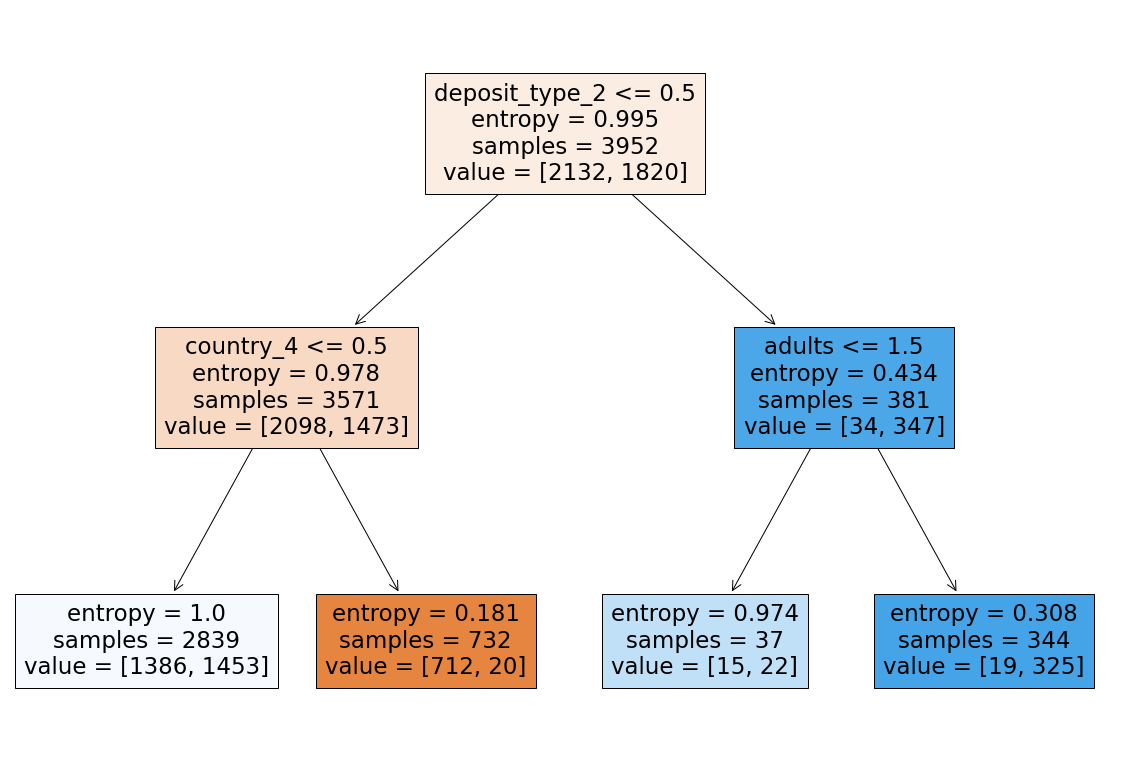

In [187]:
plt.figure(figsize=(20,14))
plot_tree(best_model[1], feature_names=features, filled=True)
plt.show()

## After Model Based Feature Selection

Setelah dilakukan pemodelan dengan memasukan semua fitur yang ada, kita melihat terdapat banyak fitur yang tidak terpakai dalam pemodelan, sehingga kita akan membuat model berdasarkan fitur yang terpakai pada model sebelumnya.

### Pre-Processing Data

Skema Pre-Processing:

1. Encode pre-processing:
* onehot: distribution_channel, deposit_type
* binary: country, market_segment

2. is_canceled is already encode.        

3. We don't use hotel data because all of the value is `Resort Hotel`.       

4. adults: data passthrough. 

In [200]:
x2=df[['distribution_channel', 'deposit_type','country', 'market_segment','adults']] 
#Hanya 5 feature yang dipilih untuk modelling
y2=df['is_canceled']

In [201]:
transformer2=ColumnTransformer([
    ('onehot',ce.OneHotEncoder(drop_invariant=True),['distribution_channel', 'deposit_type']),
    ('binary',ce.BinaryEncoder(drop_invariant=True),['country', 'market_segment'])
], remainder='passthrough')

### Data Splitting

In [202]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, stratify=y2, test_size=0.2, random_state=2020)

### Model Benchmarking and Metric Evaluation

Untuk model benchmarking, terdapat 4 model machine learning yang dipilih, yakni:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. XGBoost Classifier

In [203]:
# Memanggil algoritma untuk model benchmarking
logreg=LogisticRegression(solver='liblinear',random_state=2020)
tree=DecisionTreeClassifier(max_depth=3, random_state=2020)
forest=RandomForestClassifier(max_depth=3, random_state=2020)
xgb=XGBClassifier(random_state=2020)
skfold=StratifiedKFold(n_splits=5)

In [204]:
# Pipeline untuk setiap model benchmarking, agar mencegah data leakage pada saat proses cross-validasi
logreg_pipe2=Pipeline([
    ('preprocessing',transformer2),
    ('model',logreg)
])
tree_pipe2=Pipeline([
    ('preprocessing',transformer2),
    ('model',tree)
])
forest_pipe2=Pipeline([
    ('preprocessing',transformer2),
    ('model',forest)
])
xgb_pipe2=Pipeline([
    ('preprocessing',transformer2),
    ('model',xgb)
])

Untuk pemilihan metric evaluasi pada kasus ini, kita akan memilih berdasarkan confusion metric, dimana sudah diset sebelumnya bahwa **default pada kasus ini adalah is_canceled (1)** dan **not default adalah not_canceled (0)**.            
Berdasarkan confusion metric terdapat empat kemungkinan antara kejadian nyata dengan prediksi data hasil machine learning, yakni:
1. Kejadian nyata is_canceled (1) diprediksi is_canceled (1) **(TP)**
2. Kejadian nyata is_canceled (1) diprediksi not_canceled (0) **(FN)**
3. Kejadian nyata not_canceled (0) diprediksi not_canceled (0) **(TN)**
4. Kejadian nyata not_canceled (0) diprediksi is_canceled (1) **(FP)**

Berdasarkan konteks bisnis proses dari industri perhotelan yang telah dijabarkan pada soal, apabila calon tamu hotel tidak membatalkan booking kamar, maka pihak hotel akan menyiapkan berbagai kebutuhan calon tamu tersebut, diantaranya menyiapkan makanan, transportasi penjemputan, bahkan menolak reservasi dari calon tamu hotel yang lainnya, *tentu saja dalam mempersiapkan hal-hal ini pihak hotel akan mengeluarkan budget untuk makanan dan transportasi, bahkan menolak reservasi lainnya yang memang menjadi sumber pendapatan dari hotel ini*.             

Pada kenyataannya, terdapat kemungkinan bahwa tamu yang sudah diprediksi akan datang akan tetapi pada kenyataannya tamu tidak datang dan menyebabkan kerugian materi/keuangan bagi pihak hotel. 

Selain itu terdapat juga kemungkinan tamu yang diprediksi tidak datang tetapi tamu tersebut datang ke hotel, untuk menangani kasus ini, pihak hotel dapat mengkoordinasikan saja kepada para pekerjanya untuk mengakomodasi kebutuhan sang tamu tersebut dengan sebaik mungkin, walaupun nama baik dan integritas dari hotel ini akan menjadi taruhannya, akan tetapi apabila pihak hotel dapat menangani kesalahan prediksi ini dengan service terbaiknya kepada tamu tersebut, mungkin tamu tersebut akan berubah pikiran dan akan merasa puas terhadap pelayanan hotel.       

Sehingga dalam model machine learning ini akan digunakan metric evaluasi **`Recall`** yang bertujuan untuk menekan prediksi *False Negative*.

In [206]:
# Cross-validation
models=[logreg_pipe2, tree_pipe2, forest_pipe2, xgb_pipe2]
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv=cross_val_score(i,x_train2,y_train2,scoring='recall')
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

pd.DataFrame({
    'model': ['Logreg','Tree','Forest','XGB'],
    'mean': mean_score,
    'std': std_score
})

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,mean,std
0,Logreg,0.882418,0.018173
1,Tree,0.980220,0.007653
2,Forest,0.980769,0.008333
3,XGB,0.892857,0.009674


Dapat dilihat pada hasil cross-vaidasi menggunakan metric evaluasi recall, model memiliki performa diatas 90% dengan standar deviasi yang kecil. Model Decision Tree Classifier menunjukan nilai cross validasi yang sangat tinggi dibandingkan model lainnya yakni 98% dengan standar deviasi yang sangat kecil dibandingkan model lainnya (model lebih stabil), sehingga **model yang dipilih untuk dilakukan hyperparameter tunning adalah Decision Tree Classifier**.

### Hyperparameter Tunning

In [218]:
# Pemilihan hyperparameter yang akan di tunning
criterion=['entropy','gini']
max_depth=[2,3,4,5,6,7]
min_samples_leaf=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
min_samples_split=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
max_features=[2,3,4,5]

tree_param={
    'model__criterion':criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split':min_samples_split,
    'model__max_features':max_features
}

In [219]:
# Menggunakan grid search untuk melakukan hyperparameter tunning dan menemukan kombinasi parameter terbaik untuk model ini
grid_search3= GridSearchCV(
    tree_pipe2,
    param_grid=tree_param,
    cv=skfold,
    scoring='recall',
    n_jobs= -1 
)

In [220]:
grid_search3.fit(x_train2,y_train2)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop_invariant=True),
                                                                         ['distribution_channel',
                                                                          'deposit_type']),
                                                                        ('binary',
                                                                         BinaryEncoder(drop_invariant=True),
                                                                         ['country',
                                                                          'market_segment'])])),
                         

In [221]:
print('best score', grid_search3.best_score_)
print('best param', grid_search3.best_params_)

best score 0.9851648351648352
best param {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__max_features': 2, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}


In [236]:
pd.DataFrame(grid_search3.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6316,0.176528,0.032089,0.043285,0.003710,gini,3,2,10,10,"{'model__criterion': 'gini', 'model__max_depth...",0.980769,0.989011,0.980769,0.991758,0.983516,0.985165,0.004464,1
929,0.113896,0.025517,0.028922,0.004965,entropy,3,2,10,100,"{'model__criterion': 'entropy', 'model__max_de...",0.980769,0.989011,0.980769,0.991758,0.983516,0.985165,0.004464,1
6301,0.109110,0.025610,0.023337,0.002570,gini,3,2,5,10,"{'model__criterion': 'gini', 'model__max_depth...",0.980769,0.989011,0.980769,0.991758,0.983516,0.985165,0.004464,1
6302,0.102127,0.017736,0.023537,0.002326,gini,3,2,5,15,"{'model__criterion': 'gini', 'model__max_depth...",0.980769,0.989011,0.980769,0.991758,0.983516,0.985165,0.004464,1
6303,0.097143,0.006782,0.028920,0.006147,gini,3,2,5,20,"{'model__criterion': 'gini', 'model__max_depth...",0.980769,0.989011,0.980769,0.991758,0.983516,0.985165,0.004464,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,0.090358,0.003657,0.024335,0.003374,gini,3,5,35,35,"{'model__criterion': 'gini', 'model__max_depth...",0.310440,0.200549,0.175824,0.184066,0.211538,0.216484,0.048601,10411
7072,0.091755,0.003624,0.025132,0.003535,gini,3,5,35,40,"{'model__criterion': 'gini', 'model__max_depth...",0.310440,0.200549,0.175824,0.184066,0.211538,0.216484,0.048601,10411
7073,0.086968,0.000747,0.021741,0.000399,gini,3,5,35,45,"{'model__criterion': 'gini', 'model__max_depth...",0.310440,0.200549,0.175824,0.184066,0.211538,0.216484,0.048601,10411
7074,0.100531,0.009553,0.023736,0.002220,gini,3,5,35,50,"{'model__criterion': 'gini', 'model__max_depth...",0.310440,0.200549,0.175824,0.184066,0.211538,0.216484,0.048601,10411


### Before vs After Tunning Performance

#### Before Tunning

In [223]:
tree_pipe2=Pipeline([
    ('preprocessing',transformer2),
    ('model',tree)
])
tree_pipe2.fit(x_train2,y_train2)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country',
                                                   'market_segment'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, random_state=2020))])

In [224]:
y_pred=tree_pipe2.predict(x_test2)
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       533
           1       0.69      0.98      0.81       455

    accuracy                           0.79       988
   macro avg       0.83      0.80      0.79       988
weighted avg       0.85      0.79      0.78       988



#### After Tunning

In [225]:
best_model2=grid_search3.best_estimator_
best_model2.fit(x_train2,y_train2)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country',
                                                   'market_segment'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_features=2, min_samples_leaf=5,
                                        min_samples_split=5,
                                        random_state=2020))])

In [226]:
y_pred=best_model2.predict(x_test2)
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58       533
           1       0.59      1.00      0.74       455

    accuracy                           0.68       988
   macro avg       0.79      0.71      0.66       988
weighted avg       0.81      0.68      0.66       988



Setelah dilakukan Hyperparameter Tunning pada Model Decision Tree, nilai recall meningkat dari 98% menjadi 100%. Karena skor untuk machine learning ini sudah tinggi sehingg tidak ada tahapan lanjutan untuk meningkatkan performa model ini.

### Model Attribute, Feature Importance, and How Machine Learning Works

In [227]:
transformer2.fit_transform(x2).shape
#Terdapat 16 kolom hasil dari encode

(4940, 16)

In [228]:
best_model2 #Best model all method in Pipeline (Transformer and Model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop_invariant=True),
                                                  ['distribution_channel',
                                                   'deposit_type']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['country',
                                                   'market_segment'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_features=2, min_samples_leaf=5,
                                        min_samples_split=5,
                                        random_state=2020))])

In [230]:
best_model2[0].transformers_[0][1].get_feature_names() #Feature name pada one hot encoder

['distribution_channel_1',
 'distribution_channel_2',
 'distribution_channel_3',
 'deposit_type_1',
 'deposit_type_2',
 'deposit_type_3']

In [231]:
best_model2[0].transformers_[1][1].get_feature_names() #Feature name pada binary encoder

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2']

In [232]:
features=best_model2[0].transformers_[0][1].get_feature_names() + best_model2[0].transformers_[1][1].get_feature_names() + ['adults']
features
#Terdapat 16 nama kolom pada feature2, sama seperti hasil fit_transform dari transformer

['distribution_channel_1',
 'distribution_channel_2',
 'distribution_channel_3',
 'deposit_type_1',
 'deposit_type_2',
 'deposit_type_3',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'adults']

In [233]:
importance_table=pd.DataFrame({'importance': best_model2[1].feature_importances_}, index=features)
importance_table.sort_values(by='importance', ascending=False)

,importance
country_4,5.173512e-01
country_2,2.170965e-01
deposit_type_1,1.871187e-01
deposit_type_2,7.843304e-02
distribution_channel_1,5.764632e-07
distribution_channel_2,0.000000e+00
distribution_channel_3,0.000000e+00
deposit_type_3,0.000000e+00
country_0,0.000000e+00
country_1,0.000000e+00


Berdasarkan Feature Importance, feature country_4, country_2, deposit_type_1, deposit_type_2 dan distribution_channel_1 merupakan lima fitur yang paling penting dalam model Decision Tree. deposit_type_1 merupakan tipe deposit dengan proporsi paling banyak dalam data, yakni `No Deposit`, deposit_type_2 merupakan `Non Refund`, distribution_channel_1 merupakan proporsi terbanyak di datanya yakni `TA/TO`, country_4 dan country_2 kemungkinan merupakan gabungan dari beberapa negara dengan proporsi jumlah paling banyak dalam data, yakni `PRT (Portugal)`, `ESP (Spanyol)`, `GBR (Inggris Raya)`, `IRL (Irlandia)`.

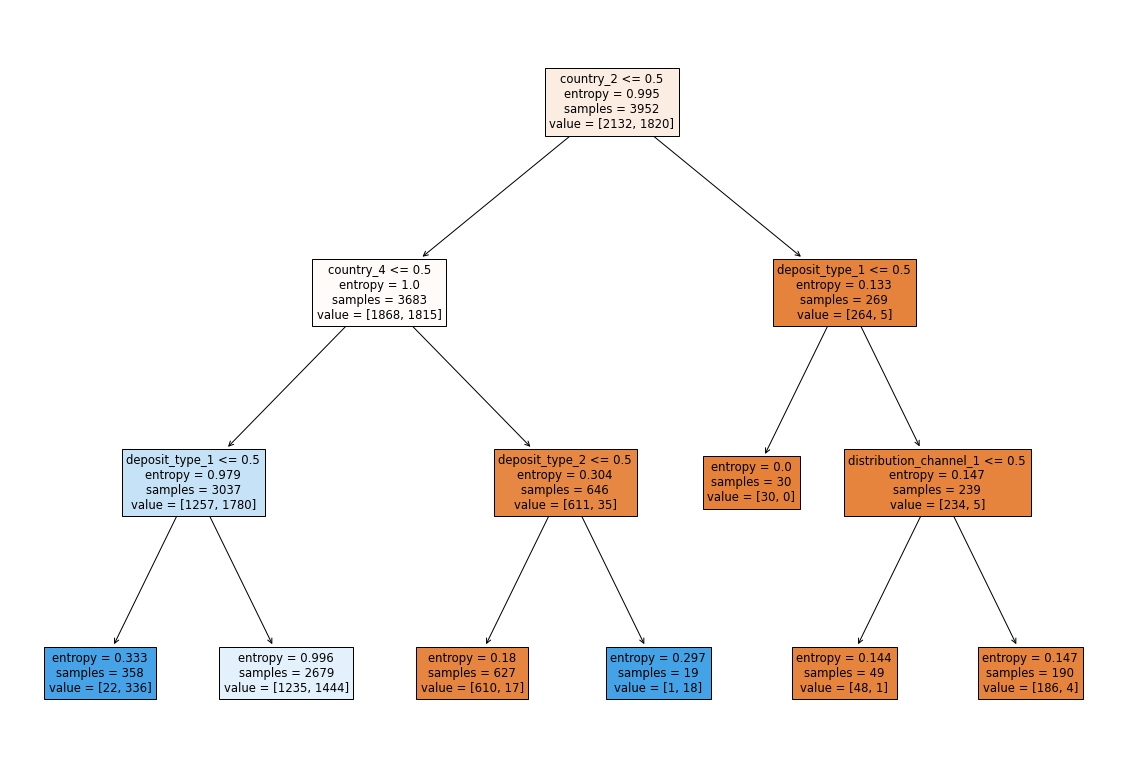

In [235]:
plt.figure(figsize=(20,14))
plot_tree(best_model2[1], feature_names=features, filled=True)
plt.show()

## Model Conclusion

Setelah dilakukan perbandingan antara before model based feature selection dengan after model based feature selection, maka model yang dipakai untuk kasus ini adalah:
* **`After Model Based Feature Selection`** dengan algoritma machine learning **`Decision Tree`** sebagai model benchmarking.
* **`Recall`** sebagai metric evaluasi dengan score `98.5%`.
* Berdasarkan **`Feature Importance`**, feature `country_4`, `country_2`, `deposit_type_1`, `deposit_type_2` dan `distribution_channel_1` merupakan lima fitur yang paling penting dalam model.
* **`Kombinasi hyperparameter`** yang paling baik di model ini adalah:
    * 'model__criterion': 'entropy' (parameter yang menunjukan bagaimana pembagian data dilakukan agar data yang dibagi dapat menjadi homogen.)
    * 'model__max_depth': 3 (parameter yang digunakan untuk mengukur jarak terpanjang dari root hingga ke leaf node terjauh dari model.)
    * 'model__max_features': 2 (parameter yang digunakan untuk mengatur banyaknya fitur yang dipakai pada saat pembagian data.)
    * 'model__min_samples_leaf': 5 (parameter yang menunjukan berapa banyak data minimum yang harus ada pada leaf yang akan dibuat selanjutnya.)
    * 'model__min_samples_split': 5 (parameter yang menunjukan berapa banyak data minimum pada leaf yang sudah terbentuk agar model dapat melakukan splitting lagi.)

Alasan dipilih model ini karena nilai akurasi yang sangat tinggi dengan tingkat kompleksitas model yang cukup tinggi jika dibandingkan dengan before model based feature selection. Apabila kita memilih decision tree pada before model based feature selection maka ada kecenderungan untuk overfitting dikarenakan model yang dipakai terlalu sederhana.

# Impact of Implementation Machine Learning in Business Performance

Pengaruh penggunaan machine learning terhadap performa bisnis dapat dilihat dari berapa banyak keuntungan yang diperoleh ataupun berapa banyak potensi kerugian yang bisa dikurangi dengan pemakaian machine learning. Dalam kasus ini hal yang ingin ditekan adalah kesalahan dalam memprediksi cancellation booking hotel atau tidak, dimana hal yang paling merugikan adalah saat kita memprediksi tamu akan datang akan tetapi kenyataannya tidak datang ke hotel (booking cancellation). Potensi kerugian yang dapat ditekan karena pemakaian machine learning adalah sebagai berikut:
* Terdapat 2298 kesalahan prediksi (default) dari total 5000 data (Sekitar 46% kesalahan dalam memprediksi).
* Model machine learning yang dibuat berdasarkan decision tree classifier memiliki skor 98.5% atau galat sekitar 1.5%.
* Harga hotel yang dipakai pada perhitungan ini adalah data rata-rata hotel di negara portugal, karena pada dataset ini negara paling banyak adalah negara portugal, yaitu sebesar (75 USD, sumber: https://championtraveler.com/price/cost-of-a-trip-to-portugal/).
* **Potensial loss tanpa machine learning** = jumlah kesalahan prediksi x harga rata-rata hotel = 2298 x 75 USD = **172350 USD**.
* **Potensial loss dengan machine learning** = persentase galat machine learning x total data x harga rata-rata hotel = 1.5% x 5000 x 75 USD = **5625 USD**.
`Dapat dilihat bahwa penggunaan machine learning dapat mengurangi potensial loss dari 172350 USD menjadi hanya 5625 USD atau berkurang sebesar 96.7%.`